In [25]:
import itertools
import random

import matplotlib.pyplot as plt
import numpy as np
import tqdm


def urn_simulation(
    rounds: int,
    poisson_mean: float,
    base_pool_size: int,
    new_element_increment: int,
    new_opportunity_increment: int,
):
    base_pool = list(range(base_pool_size))
    element_have_seen = set()
    pairs_have_seen = set()
    element_counts = []
    pairs_counts = []
    
    for _ in range(rounds):
        number_of_items_in_post = np.random.poisson(poisson_mean)
        elements_in_post = []
        for _ in range(number_of_items_in_post):
            new_element = random.choice(base_pool)
            base_pool.extend([new_element for _ in range(new_element_increment)])
            if new_element not in element_have_seen:
                base_pool.extend([base_pool[-1] + i for i in range(1, new_opportunity_increment + 1)])
            element_have_seen.add(new_element)
            elements_in_post.append(new_element)
        for element_a, element_b in itertools.combinations(elements_in_post, 2):
            canonical_name = "|".join(sorted([str(element_a), str(element_b)]))
            pairs_have_seen.add(canonical_name)
        element_counts.append(len(element_have_seen))
        pairs_counts.append(len(pairs_have_seen))
    
    return {
        "element_counts": np.array(element_counts),
        "pairs_counts": np.array(pairs_counts),
    }


def run_simulation(
    epochs: int,
    rounds: int,
    poisson_mean: float,
    base_pool_size: int,
    new_element_increment: int,
    new_opportunity_increment: int,
):
    results =  {
        "element_counts": np.zeros(rounds),
        "pairs_counts": np.zeros(rounds),
    }
    for _ in tqdm.tqdm(range(epochs)):
        new_sim = urn_simulation(
            rounds, poisson_mean, base_pool_size, new_element_increment, new_opportunity_increment)
        results["element_counts"] += new_sim["element_counts"]
        results["pairs_counts"] += new_sim["pairs_counts"]
    results["element_counts"] /= epochs
    results["pairs_counts"] /= epochs
    
    return results

100%|█████████| 100/100 [00:47<00:00,  2.12it/s]


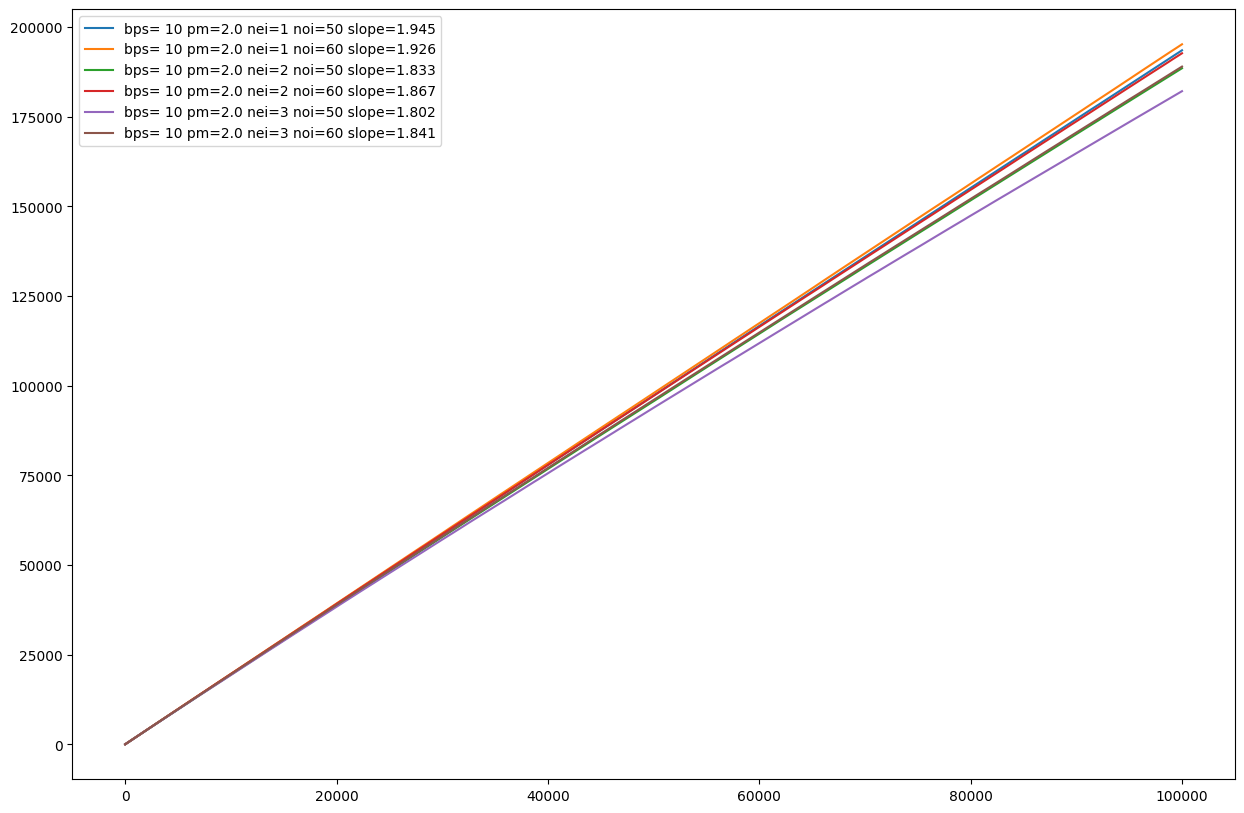

In [62]:
ROUNDS = 100_000
plt.figure(figsize=(15,10))
for base_pool_size in range(10,11):
    for poisson_mean in np.arange(2.0, 2.1, 1.0):
        for new_element_increment in range(1, 4):
            for new_opportunity_increment in range(50, 61, 10):
                results = run_simulation(100, ROUNDS, poisson_mean, base_pool_size, new_element_increment, new_opportunity_increment)
                slope = round((results["pairs_counts"][-1] - results["pairs_counts"][-101])/100, 3)
                plt.plot(range(ROUNDS), results["pairs_counts"],
                         label=f"bps= {base_pool_size} pm={poisson_mean} nei={new_element_increment} noi={new_opportunity_increment} slope={slope}")
plt.legend(fontsize=10)